//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


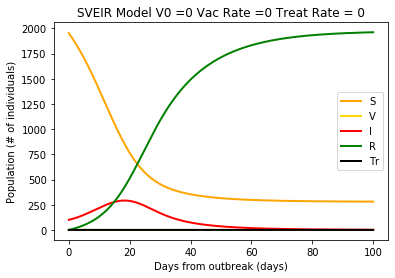

V0 =0 vac rate =0 treat rate =0
R = 1962.4259727866913 Tr = 0.0 V = 0.0 I = 1.4613449018497835 S = 280.97654194617894


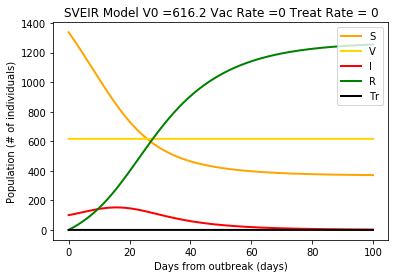

V0 =616.2 vac rate =0 treat rate =0
R = 1254.9955831727978 Tr = 0.0 V = 616.2 I = 2.1158681012723286 S = 370.885928132585


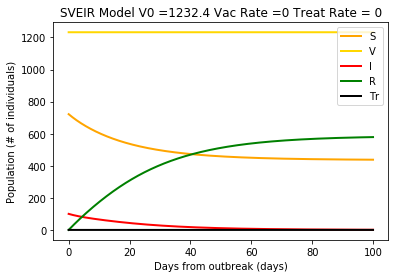

V0 =1232.4 vac rate =0 treat rate =0
R = 578.7142158284474 Tr = 0.0 V = 1232.4 I = 1.0464207693570902 S = 437.7452163508777


In [16]:
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
# SVEIR Model for infectious disease
# S - number of Susceptible individuals
# V - number of Vaccinated individuals
# E - number of Exposed, contagious indivduals
# I - number of Infected individuals
# Tr - number of Treated indivduals
# R - number of Recovered individuals

# Choose total time of simulation, T
T = 100 

# Chose time step
dt=0.05

#Calculate number of time steps
nsteps=T/dt
  
# Create time grid
t  = np.linspace(0, T, nsteps) 

vac_list = [0, 61.62, 123.24]
treat_list = [0, 1000, 2000]
nat_recovery_list = [2000, 1000, 0]
v_zero_list = [0, 616.2, 1232.4]

# To adjust the output of the graphs, change the range of the for loops for z, x, and m.
# Recall that z corresponds to the range of preseason vaccination, x corresponds to in 
# season vaccination rates, and m corresponds to the proportion of I being treated or recovering naturally. 

#To produce figure 2, limit the ranges of z and x to (0, 1) in lines 43-44. Also comment out all plots besides I and Tr
# by putting a # in front of the code on line 140, 141, and 143.

#To produce figure 3, limit the range of x and m to (0, 1) in lines 44-45. Also comment out all plots besides V and I
# by putting a # in front of the code on lines 140, 143, 144

#To produce figure 4, limit the ranges of z and m to (0,1) in lines 43 and 45. Also comment out all plots besides V and I 
# by putting a # in front of the code on lines 140, 143, 144

for z in range(0, 3) :    
    for x in range(0, 1) :
        for m in range(0, 1) :
            vaccine_use = vac_list[x]
            treatment_use = treat_list[m]
            prop_natural_recovery = nat_recovery_list[m]
            V0 = v_zero_list[z]
            
            # Choose initial conditions
            E0 = 200
            I0 = 100
            Tr0 = 0
            R0 = 0
            
            S0 = 2054 - V0 - I0
            
            y0= [S0, V0, E0, I0, Tr0, R0]
            
            def vaccine_loop(t) :
                if t < 5.0 :
                    return 0
                elif t >15 :
                    return 0
                else :
                    return vaccine_use
    
            def f(y, t):

        #Parameters
        #transmission rate 
                trans = 0.01
        #infectious period (days)
                inf_period = 14
        #infectious period (days) for treated
                treated_inf_period = 7
        #incubation period
                incubation = 14
        #contact rate
                cont_rate = 50
        #Vaccine Efficacy 
                vaccine_eff = 0.3

#assign input vector,y to variables of the model
                S = y[0]
                V = y[1]
                E = y[2]
                I = y[3]
                Tr = y[4]
                R = y[5]

# Calculate total population size,N
                N=S+V+E+I+Tr+R

# Parameters of SEIR model
                alpha = (((vaccine_loop(t) * vaccine_eff)/N))

                beta = (cont_rate*trans)/N

                gamma = (treatment_use/S)

                epsilon = 1/inf_period

                zeta = 1/treated_inf_period

                omega = 1/incubation
                
                iota = (prop_natural_recovery/S)

# Fine right hand side of differential equations, dS/dt=f0, dE/dt, dI/dt=f1, dR/dt=f2
                f0_susceptible = -(alpha*S)-(beta*S*I) 

                f1_vaccinated = alpha*S

                f2_exposed = (beta*S*I) - (omega*E) 

                f3_infected = (omega*E) - (I*gamma*zeta) - (I*epsilon*iota) 

                f4_treated = (I*gamma*zeta)

                f5_recovered = (iota*epsilon*I)
    
    # output right-hand side of differetial equations
                return [f0_susceptible, f1_vaccinated, f2_exposed, f3_infected, f4_treated, f5_recovered]
            
            # solve system of differential equations
            soln = odeint(f, y0, t)
            
            # assign solution vector,soln, to plotting variables
            plot_S = soln[:, 0]
            plot_V = soln[:, 1]
            plot_E = soln[:, 2]
            plot_I = soln[:, 3]
            plot_Tr = soln[:, 4]
            plot_R = soln[:, 5]
            
            # plot results
            plt.figure()
            plt. plot(t, plot_S, lw = 2, color = 'orange', label = 'S')
            plt. plot(t, plot_V, lw = 2, color = 'gold'  , label = 'V')
            plt. plot(t, plot_I, lw = 2, color = 'red'  , label = 'I')
            plt. plot(t, plot_R, lw = 2, color = 'green'  , label = 'R')
            plt. plot(t, plot_Tr, lw = 2, color = 'black'  , label = 'Tr')

            xlabel('Days from outbreak (days)')
            ylabel('Population (# of individuals)')

            legend(loc=0)
            plt.title('SVEIR Model V0 =' + str(V0) + ' Vac Rate =' + str(vaccine_use) + \
                      ' Treat Rate = ' + str(treatment_use))
            plt.show()
            
            print('V0 =' + str(V0), 'vac rate =' + str(vaccine_use), 'treat rate =' + str(treatment_use))
            print('R =', plot_R[-1], 'Tr =', plot_Tr[-1], 'V =', plot_V[-1], 'I =', plot_I[-1], 'S =', plot_S[-1])